In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data into python environment
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#Data Preprocessing


In [5]:
#Missing values
data.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [6]:
#No missing values


#Visualization


<ipython-input-7-3cfcad8d37fc>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data['Channel']).plot.pie(autopct='%1.1f%%')


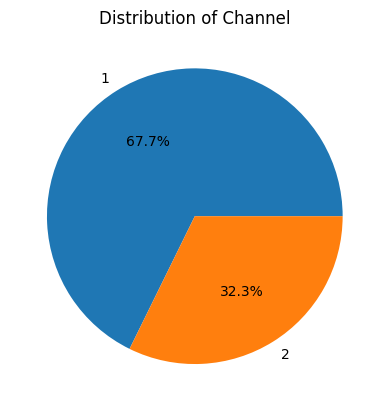

In [7]:
pd.value_counts(data['Channel']).plot.pie(autopct='%1.1f%%')
plt.title("Distribution of Channel")
plt.ylabel("")
plt.show()

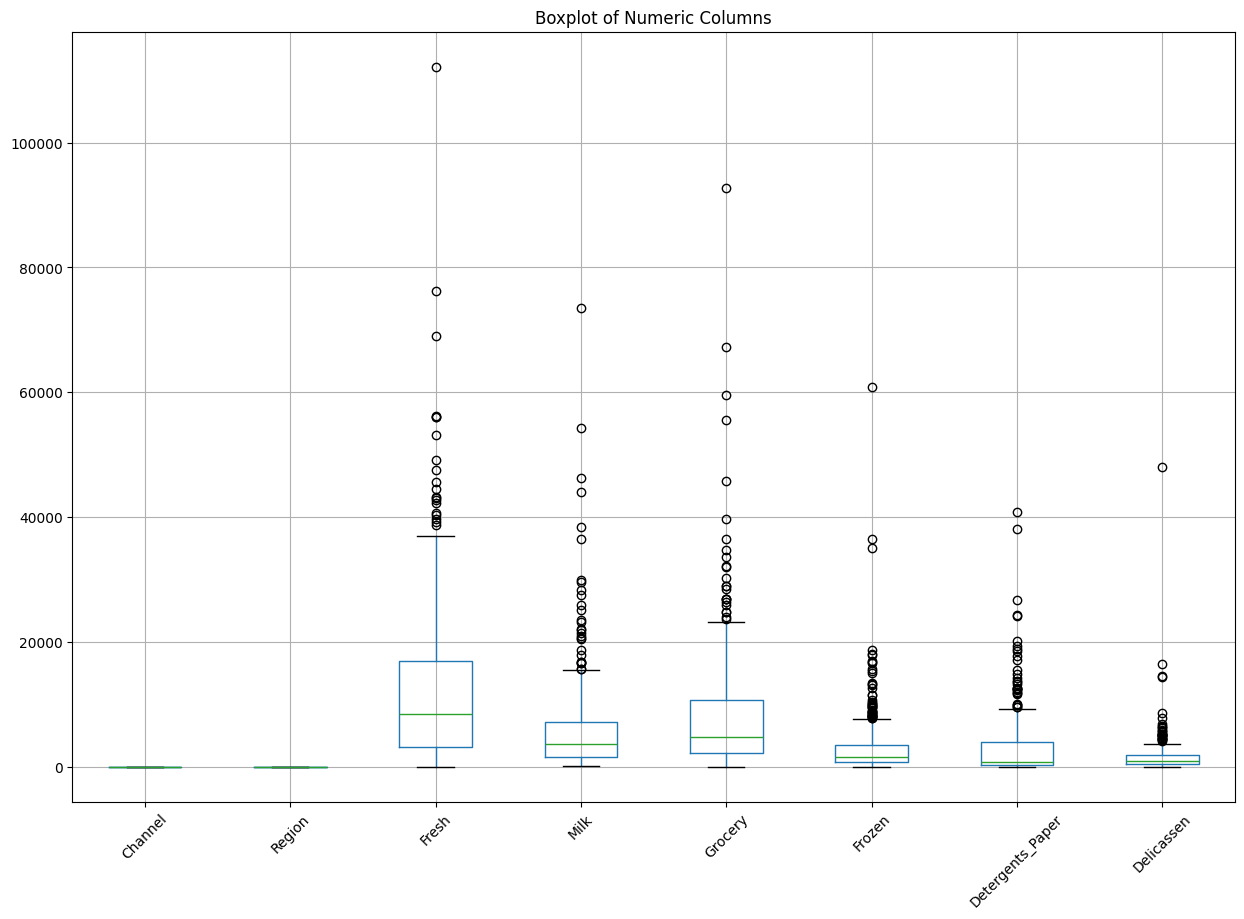

In [8]:
numeric_columns = data.select_dtypes(include='int64').columns
plt.figure(figsize=(15, 10))
data[numeric_columns].boxplot()
plt.title("Boxplot of Numeric Columns")
plt.xticks(rotation=45)
plt.show()

#Find Optimal Clusters - Elbow Method for K-Means

In [9]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
x= data[['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [11]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

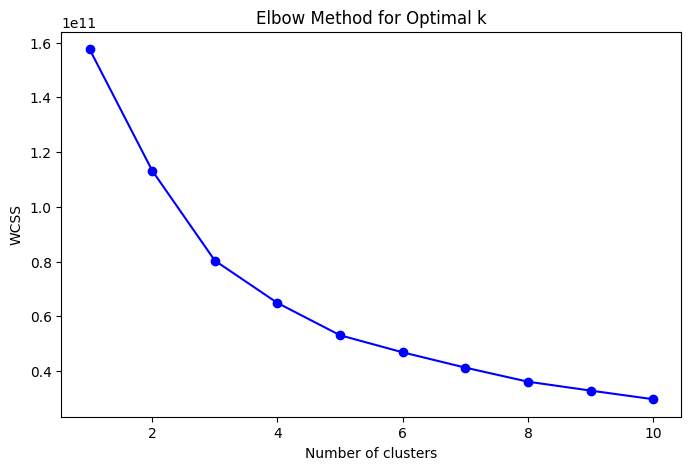

In [12]:
wcss = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_k, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

In [13]:
#Optimal number of clusters  = 5

In [14]:
km = KMeans(n_clusters=4, n_init= 10)
km.fit(x)

KMeans(n_clusters=4, n_init=10)

In [15]:
clustered_labels = km.fit_predict(x)

In [16]:
pd.Series(clustered_labels).value_counts()

,count
2,276
3,95
0,58
1,11


In [17]:
data['cluster_labels'] = clustered_labels

In [18]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster_labels'],
      dtype='object')

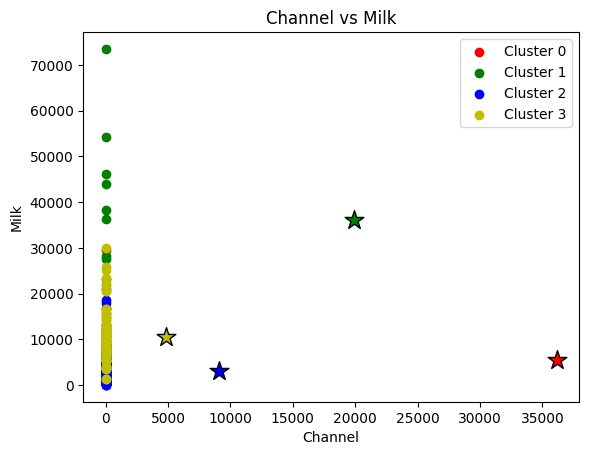

In [19]:
colors = ['r','g','b','y','c']
for i in range(max(clustered_labels)+1):
  cluster_data = x[clustered_labels == i]
  plt.scatter(cluster_data['Channel'],cluster_data['Milk'],
  c= colors[i], label =f'Cluster {i}')
  plt.scatter(km.cluster_centers_[i,2], km.cluster_centers_[i,3],
              c =colors[i],marker='*',s =200,edgecolor = 'black') # only annual income and Spending score is needed 2,3
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Channel vs Milk')
plt.show()

#Agglomerative HC

In [20]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [21]:
mergings  = linkage(x,method ='ward')

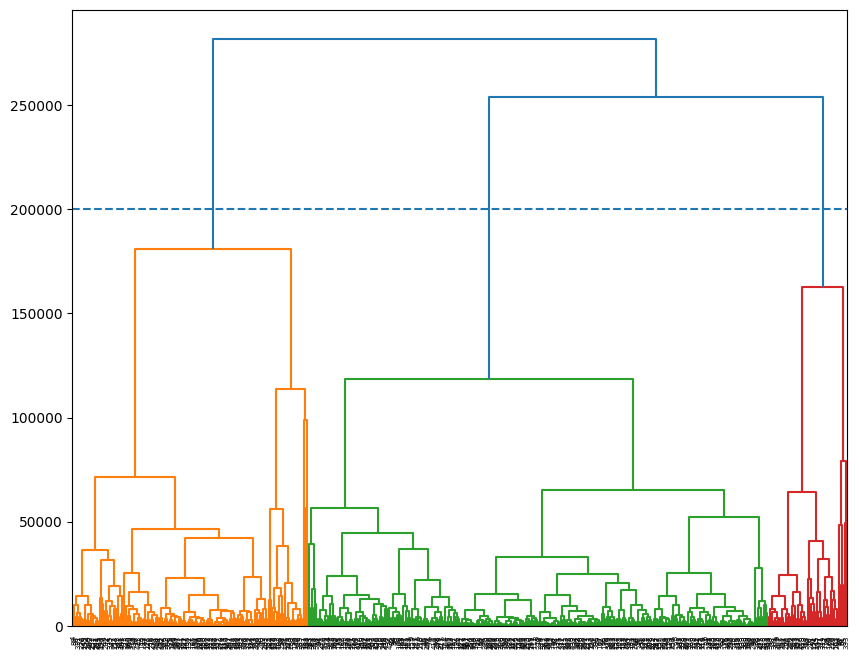

In [22]:
plt.figure(figsize=(10,8))
plt.axhline(200000,linestyle='--')
dendrogram(mergings)
plt.show()

In [23]:
clusters = fcluster(mergings,200000,criterion='distance')

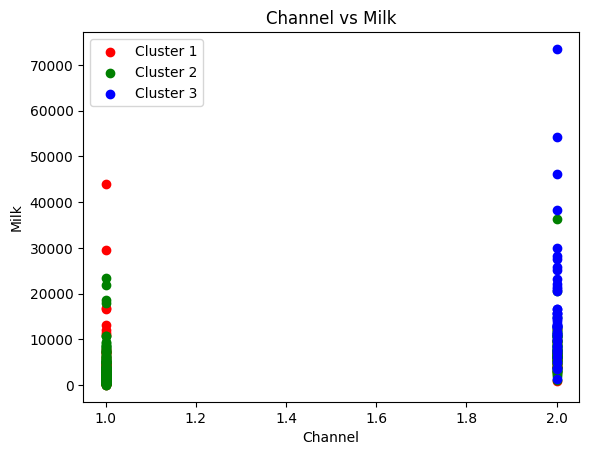

In [24]:
colors = ['r','g','b']
for i in range(1,max(clusters)+1):
  cluster_data = x[clusters == i]
  plt.scatter(cluster_data['Channel'],cluster_data['Milk'],
  c= colors[i-1], label =f'Cluster {i}')

plt.legend()
plt.xlabel('Channel')
plt.ylabel('Milk')
plt.title('Channel vs Milk')
plt.show()

#Silhouette Score

In [25]:
#kmeans
silhouette_score_avg = silhouette_score(x,clustered_labels)
print(silhouette_score_avg)

0.3866313675434283


In [26]:
#HC
sil_score_hc = silhouette_score(x,clusters)
print(sil_score_hc)

0.3750155190004844


#PCA

In [27]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster_labels'],
      dtype='object')

In [28]:
data = data.drop(['cluster_labels'], axis=1)

In [29]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [30]:
from sklearn.preprocessing import scale
scale(data)

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [31]:
from sklearn.decomposition import PCA
pc = PCA(n_components=3)
pc_array = pc.fit_transform(x)

In [32]:
pc_array = pd.DataFrame(pc_array,columns = ['PC1','PC2','PC3'])

In [33]:
pc.explained_variance_

array([1.64995904e+08, 1.45452098e+08, 2.51399785e+07])

In [34]:
pc.explained_variance_ratio_

array([0.45961362, 0.40517227, 0.07003008])

In [35]:
#86% data can be explained with the first 2 PComponents

In [36]:
x.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

#DBSCAN

In [37]:
X= x.values

In [38]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.5,min_samples=80)
model.fit(X)

DBSCAN(min_samples=80)

In [39]:
y_pred=model.fit_predict(X)
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

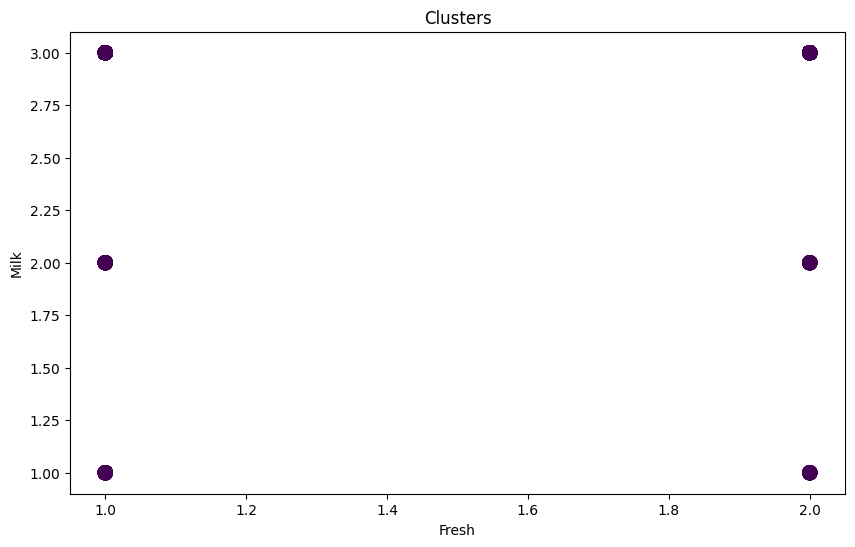

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y_pred,s=100,cmap='viridis')
plt.title('Clusters')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()